digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image

In [1]:
#Starting with Standard Imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [2]:
#loading the digits and then finding the KMeans clusters
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
# KMeans import from Scikit-Learn
from sklearn.cluster import KMeans

In [5]:
#performing the clustering
kmeans = KMeans(n_clusters=10, random_state=3)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape


(10, 64)

The result is 10 clusters in 64 dimensions. Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster. 

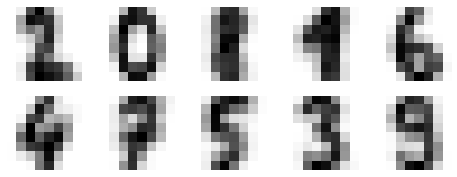

In [6]:
#Let's see what these cluster centers look like
#THis has nothing to do with MachineLearning Algorithm
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [7]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [8]:
#check how accurate our unsupervised clustering was in finding similar digits within the data:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7896494156928213

With just a simple k-means algorithm, we discovered the correct grouping for 80% of the input digits!

# confusion matrix

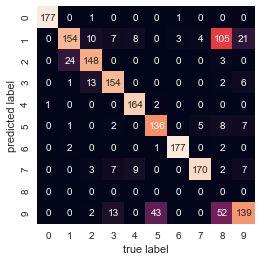

In [9]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones.